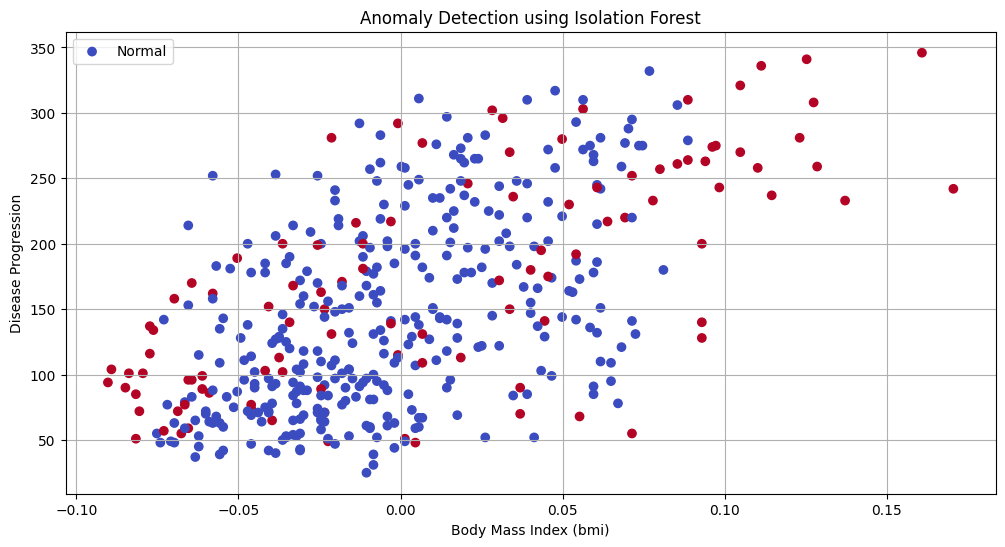

Number of anomalies detected: 104

Anomalous data points:
          age       sex       bmi        bp        s1        s2        s3  \
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
10  -0.096328 -0.044642 -0.083808  0.008101 -0.103389 -0.090561 -0.013948   
15  -0.052738  0.050680 -0.018062  0.080401  0.089244  0.107662 -0.039719   
21  -0.085430  0.050680 -0.022373  0.001215 -0.037344 -0.026366  0.015505   
26  -0.107226 -0.044642 -0.077342 -0.026328 -0.089630 -0.096198  0.026550   
..        ...       ...       ...       ...       ...       ...       ...   
417 -0.052738 -0.044642  0.071397 -0.074527 -0.015328 -0.001314  0.004460   
422 -0.078165  0.050680  0.077863  0.052858  0.078236  0.064447  0.026550   
425 -0.078165 -0.044642 -0.040696 -0.081413 -0.100638 -0.112795  0.022869   
428  0.048974  0.050680  0.088642  0.087287  0.035582  0.021546 -0.024993   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4    

In [4]:
# Anomaly Detection using Isolation Forest

# Step 1: Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Step 2: Load the Diabetes Dataset
diabetes = load_diabetes()
data = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
data['target'] = diabetes.target

# Step 3: Select Features for Analysis
selected_features = ['age', 'bmi', 'bp']
df = data[selected_features].copy()

# Step 4: Standardize the Features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Step 5: Initialize and Fit the Isolation Forest Model
iso_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
iso_forest.fit(df_scaled)

# Step 6: Predict Anomalies
predictions = iso_forest.predict(df_scaled)
df['Anomaly'] = predictions
df['Anomaly'] = df['Anomaly'].map({1: 0, -1: 1})  # 0: Normal, 1: Anomaly

# Step 7: Visualize Anomalies
plt.figure(figsize=(12, 6))
plt.scatter(df['bmi'], data['target'], c=df['Anomaly'], cmap='coolwarm', label='Data Points')
plt.xlabel('Body Mass Index (bmi)')
plt.ylabel('Disease Progression')
plt.title('Anomaly Detection using Isolation Forest')
plt.legend(['Normal', 'Anomaly'])
plt.grid(True)
plt.show()

# Step 8: Output Anomalies
print("Number of anomalies detected:", df['Anomaly'].sum())
print("\nAnomalous data points:")
print(data[df['Anomaly'] == 1])